# Single integrating sphere measurements

**Scott Prahl**

**Feb 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython

%config InlineBackend.figure_format='retina'

## Substitution vs Replacement Measurements

Integrating spheres are most easily used to make relative (rather than absolute) measurements.  The total reflected light from a sample is compared to a standard or to the light hitting the sphere wall directly.

This section will calculate the measured relative value for a particular experiment.

## Definitions

If we look at a cross-section of an integrating sphere used in to measure transmission (left) and reflection (right) then we can see the diameters of the sphere and each of the ports.

<center>
    <img src="sphere.png" width="50%" />
</center>

The natural thing would be to use subscripts and define the relative area of the sample as $a_\mathrm{sample}$. Relative area parameters are 

$$
a_\mathrm{sample} = \frac{\mbox{Area of sample port}}{\mbox{Surface area of integrating sphere}}
$$

Other relative areas are the area of the detector  $a_\mathrm{detector}$, the area of the empty port $a_\mathrm{empty}$, and the area of the sphere wall $a_\mathrm{wall}$

The total sphere surface includes the sphere has wall and ports (sample, detector, and empty).  Thus

$$
A_\mathrm{total} = A_\mathrm{wall} + A_\mathrm{sample} +  A_\mathrm{detector} +  A_\mathrm{empty}
$$

or in terms of dimensionless relative areas 

$$
a_\mathrm{wall} = 1 -  a_\mathrm{sample} - a_\mathrm{detector} - a_\mathrm{empty}
$$

One thing to note is that for the sphere on the left (the transmission experiment) the empty port does not exist and therefore has zero area.  The fraction of the sphere walls that is covered by ports is greater in the experiment on the left than the one on the right.  Thus the relative wall area $a_\mathrm{wall}$ for the two experiments will be different.

### A simple sphere model

The simplest possible model for the effect of the integrating sphere assumes that all the ports reflect no light. This is not a terrible model because both the empty port and detector typically have low reflectivity.

$$
M_\mathrm{simple} = \frac{P_\mathrm{wall}}{P_0} =  \frac{r_0}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$

The value of $r_0$ varies with the experimental configuration. If the light is collimated, it might hit the sphere wall or a sample or it might pass through the a sample.  It is also possible that the light enters the sphere fully diffuse.  Some possible cases are

* $r_0=r_\mathrm{wall}$: collimated light hits the wall of the sphere first
* $r_0=$ UR1 : collimated light directly hits the sample and the sphere collects the reflected light
* $r_0=$ UT1 : collimated light directly hits the sample and the sphere collects the transmitted light

The gain is defined as the increase in irradiance on the detector 

$$
G_\mathrm{simple} \equiv \frac{P_\mathrm{detector} /A_\mathrm{detector}}{P_0/A} = \frac{P_\mathrm{detector}}{P_0}\cdot \frac{A}{A_\mathrm{detector}} = \frac{a_\mathrm{detector}P_\mathrm{wall}}{P_0}\cdot \frac{1}{a_\mathrm{detector}}= M_\mathrm{simple}
$$


### A good sphere model with sample and detector ports

Since the sample reflectivity is not zero and it should be included in the model.  Again, we start with a power $P_0$.  The first bounce will be  

$$
\mbox{first incidence on walls} = r_0 P_0 a_\mathrm{wall}
$$

This light $r_0 P_0$ is assumed to be completely diffuse and reach all ports and walls in the sphere.  The  light reflected for the second bounce will be

$$
\mbox{second bounce} = r_0 P_0 a_\mathrm{wall} \cdot (r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})
$$

The second bounce is also totally diffuse and the third bounce will be

$$
\mbox{third bounce} = r_0 P_0 a_\mathrm{wall}\cdot (r_\mathrm{wall} a_\mathrm{wall} + r_\mathrm{detector} a_\mathrm{detector} + r_\mathrm{sample} a_\mathrm{sample})^2
$$

Adding everything together, we get the total power on the walls

$$
P_\mathrm{wall} = \frac{r_0 P_0  a_\mathrm{wall}}{1-r_\mathrm{wall} a_\mathrm{wall} - r_\mathrm{detector} a_\mathrm{detector} - r_\mathrm{sample} a_\mathrm{sample}} 
$$

And the sphere multiplier $M$ becomes

$$
M_\mathrm{good} = \frac{P_\mathrm{wall}}{P_0} = \frac{r_0  a_\mathrm{wall}}{1-r_\mathrm{wall} a_\mathrm{wall} - r_\mathrm{detector} a_\mathrm{detector} - r_\mathrm{sample} a_\mathrm{sample}}
$$

This matches the result for $M_\mathrm{simple}$ when both the detector and sample reflectance is zero.

For a reflection experiment, $r_\mathrm{sample} = \mathrm{URU}$ and $r_0 = \mathrm{UR1}$.  For a transmission experiment, $r_\mathrm{sample} = \mathrm{URU}$ and $r_0 = \mathrm{UT1}$.

$$
M_\mathrm{good} = \frac{P_\mathrm{wall}}{P_0} = \mathrm{UR1} \cdot \frac{a_\mathrm{wall}}{1-r_\mathrm{wall} a_\mathrm{wall} - r_\mathrm{detector} a_\mathrm{detector} - \mathrm{URU} \cdot a_\mathrm{sample}} \qquad\qquad \mbox{multiplier for reflection experiment}
$$

$$
M_\mathrm{good} = \frac{P_\mathrm{wall}}{P_0} = \mathrm{UT1} \cdot \frac{a_\mathrm{wall}}{1-r_\mathrm{wall} a_\mathrm{wall} - r_\mathrm{detector} a_\mathrm{detector} - \mathrm{URU} \cdot a_\mathrm{sample}} \qquad\qquad \mbox{multiplier for transmission experiment}
$$

The sphere multiplier no longer has a simple linear relationship to the reflectance or transmittance of a sample.  The two graphs below show that the non-linearity

* increases with sample diameter
* increases with wall reflectivity


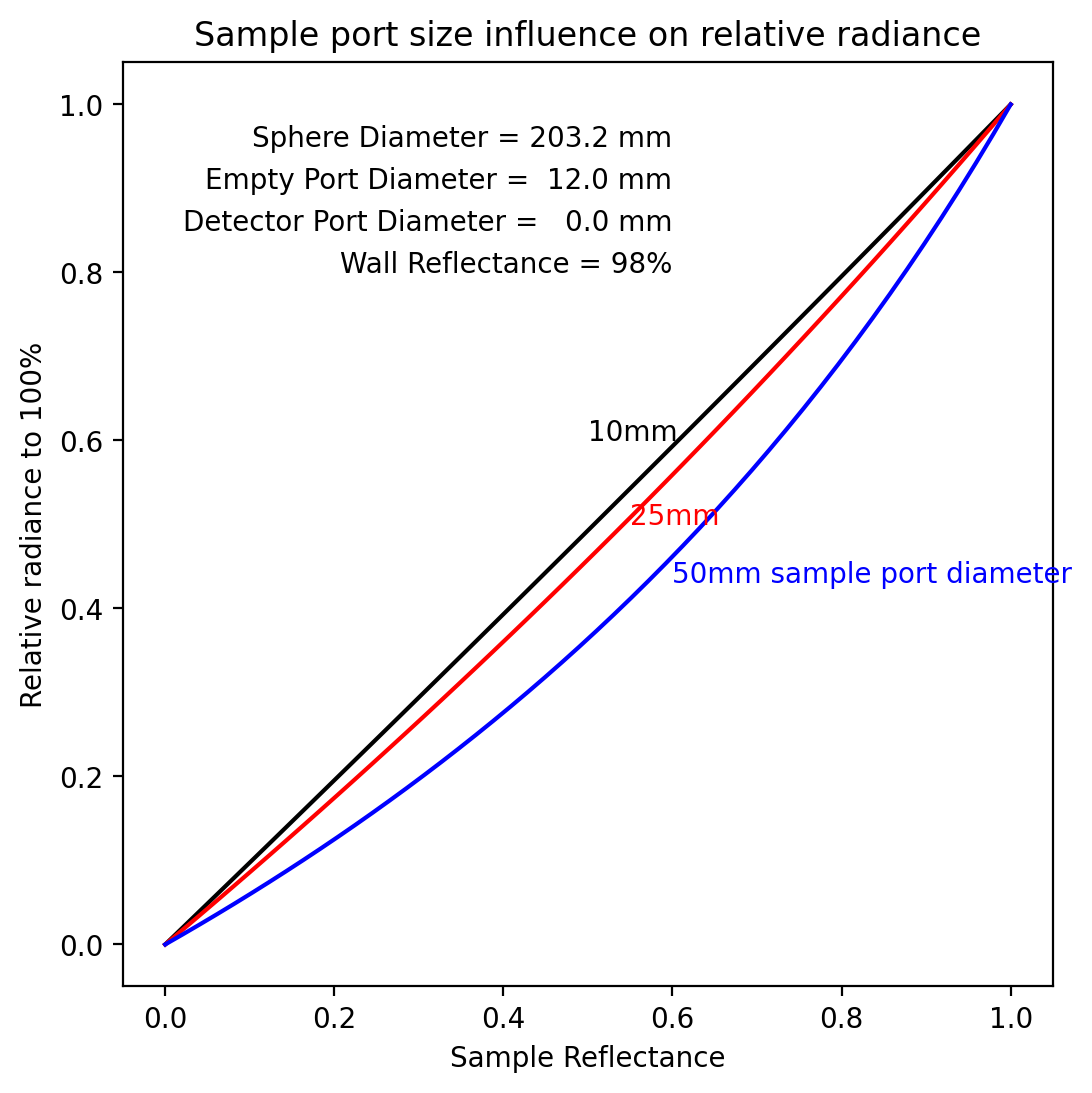

In [2]:
r_sample = np.linspace(0.0,1,50)
s = iadpython.Sphere(25.4*8, 25.4, r_wall=0.98, d_empty=12)

plt.figure(figsize=(6,6))

s.sample.d = 10
M = s.multiplier(UX1=r_sample, URU=r_sample)
plt.plot(r_sample, M/np.max(M), color='black')
plt.text(0.5,0.60,'%gmm'%(s.sample.d), color='black')

s.sample.d=25
M = s.multiplier(UX1=r_sample, URU=r_sample)
plt.plot(r_sample, M/np.max(M), color='red')
plt.text(0.55,0.5,'%gmm'%(s.sample.d), color='red')

s.sample.d=50
M = s.multiplier(UX1=r_sample, URU=r_sample)
label='$d_{sample}$=%.2f, %.0fmm sphere'%(s.a_wall,s.d)
plt.plot(r_sample, M/np.max(M), color='blue')
plt.text(0.6,0.43,'%gmm sample port diameter'%(s.sample.d), color='blue')

plt.xlabel('Sample Reflectance')
plt.ylabel('Relative radiance to 100%')
plt.title('Sample port size influence on relative radiance')
plt.text(0.6,0.95,"Sphere Diameter = %5.1f mm"%s.d, ha='right')
plt.text(0.6,0.90,"Empty Port Diameter = %5.1f mm"%(s.empty.d), ha='right')
plt.text(0.6,0.85,"Detector Port Diameter = %5.1f mm"%(s.detector.d), ha='right')
plt.text(0.6,0.80,"Wall Reflectance = %g%%"%(100*s.r_wall), ha='right')
plt.show()

Here we see the slightly perplexing result that higher wall reflectivities increase non-linearity.  This is follows from the fact that in whiter spheres, the light bounces around more times.  The light has more chances to interact with the sample and therefore the sample ends up having a larger non-linear impact.

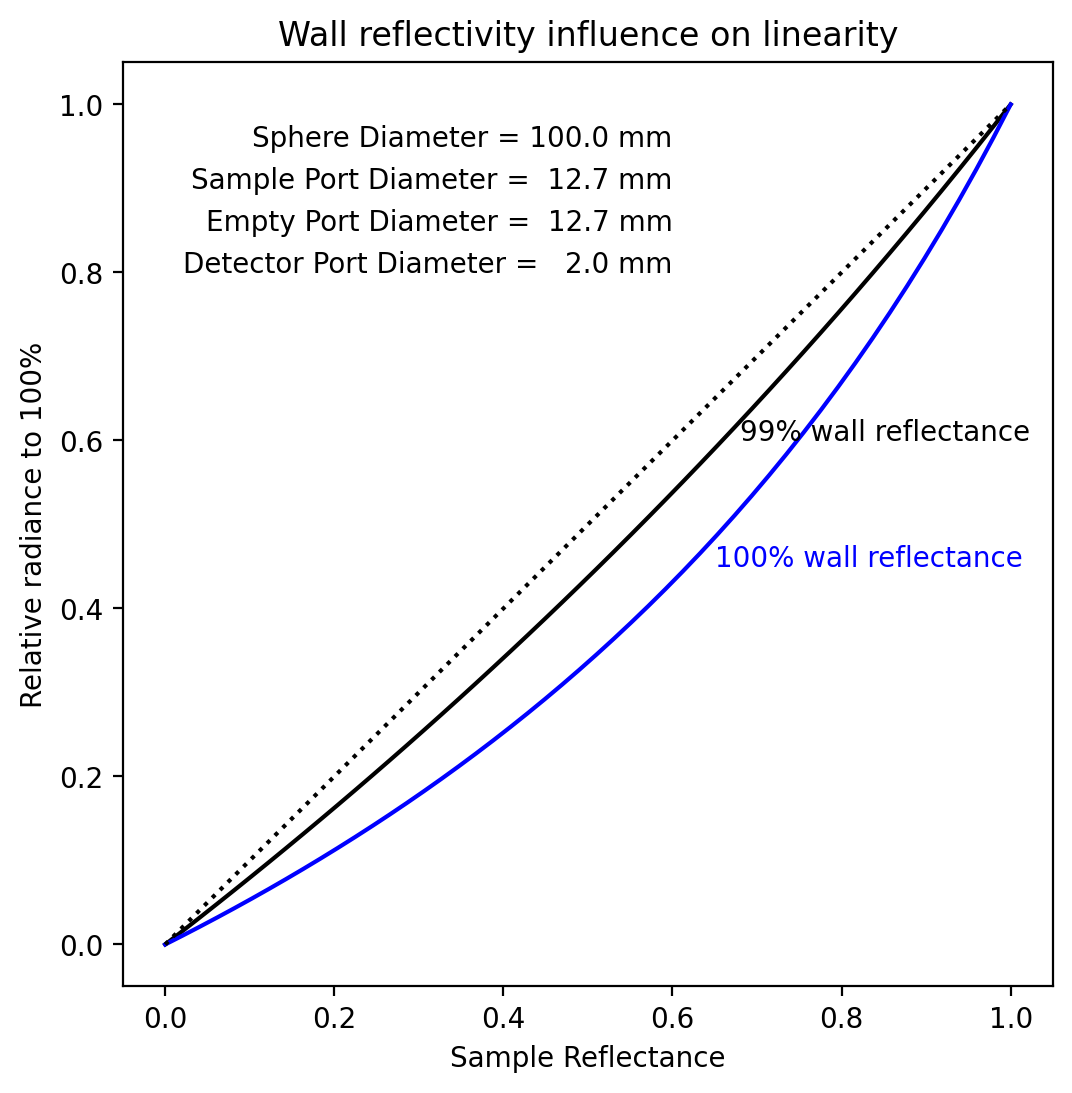

In [3]:
r_sample = np.linspace(0.0,1,50)
s = iadpython.Sphere(100, 12.7, d_empty=12.7, d_detector=2)

plt.figure(figsize=(6,6))

s.r_wall=0.99
M = s.multiplier(UX1=r_sample, URU=r_sample)

M100 = M[-1]
plt.plot(r_sample, M/M100, color='black')
plt.text(0.68,0.60,'%g%% wall reflectance'%(100*s.r_wall), color='black', ha='left')

s.r_wall=1.00
M = s.multiplier(UX1=r_sample, URU=r_sample)
plt.plot(r_sample, M/np.max(M), color='blue')
plt.text(0.65,0.45,'%g%% wall reflectance'%(100*s.r_wall), color='blue', ha='left')

plt.plot([0,1],[0,1],':k')
plt.xlabel('Sample Reflectance')
plt.ylabel('Relative radiance to 100%')
plt.title('Wall reflectivity influence on linearity')
plt.text(0.6,0.95,"Sphere Diameter = %5.1f mm"%s.d, ha='right')
plt.text(0.6,0.90,"Sample Port Diameter = %5.1f mm"%(s.sample.d), ha='right')
plt.text(0.6,0.85,"Empty Port Diameter = %5.1f mm"%(s.empty.d), ha='right')
plt.text(0.6,0.80,"Detector Port Diameter = %5.1f mm"%(s.detector.d), ha='right')
plt.show()

1. what is gain
2. what is f
3. multiport analysis for UR1
4. multiport analysis for UT1
5. calculation of b1 and b2
6. calculation of sphere wall reflectivity
7. How much of an effect do these equations have??


## Sphere model that includes non-zero reflectance by detector and sample

We will calculate the first bounce of light for the reflection case and then for the transmission case.  We start with the initial power hitting the walls

### First incidence in reflection experiment

Consider a reflection experiment.  In this case the light power, $r_0 P_0$, reflected by the sample will only fall on the walls and the empty port.  It cannot hit the detector (because of a baffle) and it cannot hit the sample (because that is where it is leaving).

$$
P_\mathrm{wall}^{(1)} = \frac{A_\mathrm{wall}}{A-A_\mathrm{detector}-A_\mathrm{sample}} r_0 P_0, \qquad P_\mathrm{sample}^{(1)} = 0, \qquad 
P_\mathrm{detector}^{(1)} = 0, \qquad 
P_\mathrm{empty}^{(1)} = \frac{A_\mathrm{empty}}{A-A_\mathrm{detector}-A_\mathrm{sample}} r_0 P_0
$$

or (after dividing numerator and denominators in the fractions by $A$

$$
P_\mathrm{wall}^{(1)} = \frac{a_\mathrm{wall}}{a_\mathrm{wall}+a_\mathrm{empty}} r_0 P_0, \qquad 
P_\mathrm{sample}^{(1)} = 0, \qquad 
P_\mathrm{detector}^{(1)} = 0, \qquad 
P_\mathrm{empty}^{(1)} = \frac{a_\mathrm{empty}}{a_\mathrm{wall}+a_\mathrm{empty}} r_0 P_0
$$

We see that $P_0=P_\mathrm{wall}^{(1)}+P_\mathrm{empty}^{(1)}$.  The light reflected $B^{(1)}$ for this first bounce will be diffuse light leaving the walls

$$
B_\mathrm{wall}^{(1)} = r_\mathrm{wall} P_\mathrm{wall}^{(1)}, \qquad 
B_\mathrm{sample}^{(1)} = 0, \qquad 
B_\mathrm{detector}^{(1)} = 0, \qquad 
B_\mathrm{empty}^{(1)} = 0
$$

or 

$$
B_\mathrm{wall}^{(1)} = r_\mathrm{wall} \frac{a_\mathrm{wall}}{a_\mathrm{wall}+a_\mathrm{empty}} P_0, \qquad 
B_\mathrm{sample}^{(1)} = 0, \qquad 
B_\mathrm{detector}^{(1)} = 0, \qquad 
B_\mathrm{empty}^{(1)} = 0
$$



### First incidence in transmission experiment

A transmission experiment is slightly different.  Light enters the sphere through the sample (port).  The empty port is either completely closed to keep the unscattered transmission inside the sphere or configured to absorb all the light that falls on it (a light trap). 

<center>
    <img src="sphere-T.png" width="70%" />
</center>


If the power transmitted by the sample is $t_0 P_0$, then it can only fall on the walls.  It cannot hit the detector (because of a baffle) and it cannot hit the sample (because that is where it is leaving from!).  Thus the light hits the walls or possibly the ”empty“ port

$$
P_\mathrm{wall}^{(1)} = \frac{A_\mathrm{wall}}{A_\mathrm{wall}+A_\mathrm{empty}} t_0 P_0, \qquad P_\mathrm{sample}^{(1)} = 0, \qquad 
P_\mathrm{detector}^{(1)} = 0, \qquad 
P_\mathrm{empty}^{(1)} = \frac{A_\mathrm{empty}}{A_\mathrm{wall}+A_\mathrm{empty}} t_0 P_0
$$

or (after dividing numerator and denominators in the fractions by $A$

$$
P_\mathrm{wall}^{(1)} = \frac{a_\mathrm{wall}}{a_\mathrm{wall}+a_\mathrm{empty}} t_0 P_0, \qquad 
P_\mathrm{sample}^{(1)} = 0, \qquad 
P_\mathrm{detector}^{(1)} = 0, \qquad 
P_\mathrm{empty}^{(1)} = \frac{a_\mathrm{empty}}{a_\mathrm{wall}+a_\mathrm{empty}} t_0 P_0
$$

We see that again $P_0=P_\mathrm{wall}^{(1)}+P_\mathrm{empty}^{(1)}$.  The light reflected $B^{(1)}$ for this first bounce will be diffuse light leaving the walls

$$
B_\mathrm{wall}^{(1)} = r_\mathrm{wall} P_\mathrm{wall}^{(1)}, \qquad 
B_\mathrm{sample}^{(1)} = 0, \qquad 
B_\mathrm{detector}^{(1)} = 0, \qquad 
B_\mathrm{empty}^{(1)} = r_\mathrm{empty} P_\mathrm{empty}^{(1)}
$$

Now there are only two configurations that the `iad` program supports.


1. When the empty port is completely closed, then $a_\mathrm{empty}=0$ and the first bounce is

    $$
    B_\mathrm{wall}^{(1)} = r_\mathrm{wall} t_0 P_0, \qquad 
    B_\mathrm{sample}^{(1)} = 0, \qquad 
    B_\mathrm{detector}^{(1)} = 0, \qquad 
    B_\mathrm{empty}^{(1)} = 0,
    $$


2. When the empty is completely open, then $r_\mathrm{empty}=0$ and the first bounce is

    $$
    B_\mathrm{wall}^{(1)} = r_\mathrm{wall} \frac{a_\mathrm{wall}}{a_\mathrm{wall}+a_\mathrm{empty}} t_0 P_0, \qquad 
    B_\mathrm{sample}^{(1)} = 0, \qquad 
    B_\mathrm{detector}^{(1)} = 0, \qquad 
    B_\mathrm{empty}^{(1)} = 0
    $$

which exactly matches the reflection calculation with $t_0$ replacing $r_0$.  We also notice that the second case also gives the correct result when $a_\mathrm{empty}=0$ and so that is the form that will be used for the transmitted light.  

### Second bounce

After the first bounce, all the light comes from the walls for either the reflection or transmission spheres.

The distribution of power of light hitting the walls a second time is

$$
P_\mathrm{wall}^{(2)} = a_\mathrm{wall} B_\mathrm{wall}^{(1)}, \qquad 
P_\mathrm{sample}^{(2)} = a_\mathrm{sample} B_\mathrm{wall}^{(1)}, \qquad 
P_\mathrm{detector}^{(2)} = a_\mathrm{detector} B_\mathrm{wall}^{(1)}, \qquad 
P_\mathrm{empty}^{(2)} = a_\mathrm{empty} B_\mathrm{wall}^{(1)}
$$

In particular

$$
P_\mathrm{wall}^{(2)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(1)}
$$

The second bounce from each part is then

$$
B_\mathrm{wall}^{(2)} = r_\mathrm{wall}P_\mathrm{wall}^{(2)}, \qquad
B_\mathrm{sample}^{(2)} = \mathrm{URU} \cdot P_\mathrm{sample}^{(2)}, \qquad
B_\mathrm{detector}^{(2)} = r_\mathrm{detector} P_\mathrm{detector}^{(2)}, \qquad
B_\mathrm{empty}^{(2)} = 0
$$

### Third bounce

The distribution of power for the third incidence arises from the walls, the sample or the detector

$$
P_\mathrm{wall}^{(3)} = a_\mathrm{wall} (B_\mathrm{wall}^{(2)} + B_\mathrm{sample}^{(2)} + B_\mathrm{detector}^{(2)})\qquad 
P_\mathrm{sample}^{(3)} = a_\mathrm{sample} B_\mathrm{wall}^{(2)}\qquad 
P_\mathrm{detector}^{(3)} = a_\mathrm{detector} B_\mathrm{wall}^{(2)}, \qquad 
P_\mathrm{empty}^{(3)} = a_\mathrm{empty} (B_\mathrm{wall}^{(2)} + B_\mathrm{sample}^{(2)} + B_\mathrm{detector}^{(2)})
$$

and if $r_\mathrm{sample}=URU$ then

$$
P_\mathrm{wall}^{(3)} = a_\mathrm{wall} r_\mathrm{wall}P_\mathrm{wall}^{(2)} + a_\mathrm{wall}r_\mathrm{sample} P_\mathrm{sample}^{(2)} + a_\mathrm{wall} r_\mathrm{detector} P_\mathrm{detector}^{(2)}
$$

The third bounce from each part is then

$$
B_\mathrm{wall}^{(3)} = r_\mathrm{wall}P_\mathrm{wall}^{(3)}, \qquad
B_\mathrm{sample}^{(3)} = \mathrm{URU} \cdot P_\mathrm{sample}^{(3)}, \qquad
B_\mathrm{detector}^{(3)} = r_\mathrm{detector} P_\mathrm{detector}^{(3)}, \qquad
B_\mathrm{empty}^{(3)} = 0
$$

### Fourth bounce

The distribution of power for the fourth incidence arises from the walls, the sample or the detector

$$
P_\mathrm{wall}^{(4)} = a_\mathrm{wall} (B_\mathrm{wall}^{(3)} + B_\mathrm{sample}^{(3)} + B_\mathrm{detector}^{(3)})\qquad 
P_\mathrm{sample}^{(4)} = a_\mathrm{sample} B_\mathrm{wall}^{(3)}\qquad 
P_\mathrm{detector}^{(4)} = a_\mathrm{detector} B_\mathrm{wall}^{(3)}, \qquad 
P_\mathrm{empty}^{(4)} = a_\mathrm{empty} (B_\mathrm{wall}^{(3)} + B_\mathrm{sample}^{(3)} + B_\mathrm{detector}^{(3)})
$$
and so

$$
P_\mathrm{wall}^{(4)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(3)} + a_\mathrm{wall}r_\mathrm{sample} P_\mathrm{sample}^{(3)} + a_\mathrm{wall}r_\mathrm{detector} P_\mathrm{detector}^{(3)}
$$

The fourth bounce from each part is then

$$
B_\mathrm{wall}^{(4)} = r_\mathrm{wall}P_\mathrm{wall}^{(4)}, \qquad
B_\mathrm{sample}^{(4)} = \mathrm{URU} \cdot P_\mathrm{sample}^{(4)}, \qquad
B_\mathrm{detector}^{(4)} = r_\mathrm{detector} P_\mathrm{detector}^{(4)}, \qquad
B_\mathrm{empty}^{(4)} = 0
$$


### kth Bounce

The light that hits the wall after $k$ bounces has the same form as above 

$$
P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} + a_\mathrm{wall} r_\mathrm{sample} P_\mathrm{sample}^{(k-1)}+ a_\mathrm{wall} r_\mathrm{detector}  P_\mathrm{detector}^{(k-1)} 
$$

Since the light falling on the sample and detector must come from the wall

$$
P_\mathrm{sample}^{(k)} = a_\mathrm{sample} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} \qquad\hbox{and}\qquad  P_\mathrm{detector}^{(k)} = a_\mathrm{detector}
r_\mathrm{wall} P_\mathrm{wall}^{(k-1)},
$$

Putting these together gives the following recurrence relation 

$$
P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} +  a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
P_\mathrm{wall}^{(k-2)}
$$

### Summing all terms from $k=3$ onwards

$$
\sum_{k=3}^\infty P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} \sum_{k=3}^\infty P_\mathrm{wall}^{(k-1)} +  a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
\sum_{k=3}^\infty P_\mathrm{wall}^{(k-2)}
$$

or

$$
\sum_{k=3}^\infty P_\mathrm{wall}^{(k)} = X = a_\mathrm{wall} r_\mathrm{wall} \sum_{k=2}^\infty P_\mathrm{wall}^{(k)} +  a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
\sum_{k=1}^\infty P_\mathrm{wall}^{(k)}
$$

$$
X = a_\mathrm{wall} r_\mathrm{wall} (P_\mathrm{wall}^{(1)} + X) +  a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
(P_\mathrm{wall}^{(1)} + P_\mathrm{wall}^{(2)} + X)
$$

$$
X (1 - a_\mathrm{wall} r_\mathrm{wall} - a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample}) = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(0)}  +  a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
(P_\mathrm{wall}^{(1)} + P_\mathrm{wall}^{(2)})
$$

$$
X (1 - a_\mathrm{wall} r_\mathrm{wall}( 1 + a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})) = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(1)}  +  a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
(P_\mathrm{wall}^{(1)} + P_\mathrm{wall}^{(2)})
$$

$$
X (1 - a_\mathrm{wall} r_\mathrm{wall}( 1 + a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})) = a_\mathrm{wall} r_\mathrm{wall} (1+ a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})P_\mathrm{wall}^{(1)}
  +  (a_\mathrm{wall} r_\mathrm{wall})^2 (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
P_\mathrm{wall}^{(1)}
$$

$$
X (1 - a_\mathrm{wall} r_\mathrm{wall}( 1 + a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})) = a_\mathrm{wall} r_\mathrm{wall} \left[ 1+ a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample}
  +  a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})\right]
P_\mathrm{wall}^{(1)}
$$

so

$$
X  = a_\mathrm{wall} r_\mathrm{wall} \frac{ 1+ a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample}
  +  a_\mathrm{wall} r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
 {1 - a_\mathrm{wall} r_\mathrm{wall}( 1 + a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
P_\mathrm{wall}^{(1)}
$$

## Total light on walls and on detector


The total power falling on the wall is just

$$
P_\mathrm{wall} = \sum_{k=1}^\infty P_\mathrm{wall}^{(k)} = X + P_\mathrm{wall}^{(1)} + P_\mathrm{wall}^{(2)} =
\frac{a_\mathrm{wall} + a_\mathrm{wall} ( a_\mathrm{detector} r_\mathrm{detector} +a_\mathrm{sample} r_\mathrm{sample})}
     {1- a_\mathrm{wall} r_\mathrm{wall}(1 + a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})} P_0
$$

The sphere multiplier will be

$$
M_\mathrm{best} = \frac{P_\mathrm{wall}}{P_0} = 
r_0 \frac{a_\mathrm{wall} + (1-a_\mathrm{empty}) ( a_\mathrm{detector} r_\mathrm{detector} +a_\mathrm{sample} r_\mathrm{sample})}
     {1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{empty})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
$$

The total power falling the detector is
$$
P_\mathrm{detector} = a_\mathrm{detector} P_0 + \sum_{k=2}^\infty a_\mathrm{detector} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} = a_\mathrm{detector} P_0 + a_\mathrm{detector} r_\mathrm{wall}
P_\mathrm{wall}
$$

## The detector gain

The gain $G(r_\mathrm{diffuse})$ on the irradiance on the detector (relative to a black sphere),

$$
G(r_\mathrm{sample}) \equiv \frac{P_\mathrm{detector} /A_\mathrm{detector}}{P_0/A} 
$$

in terms of the sphere parameters

$$
G(r_\mathrm{sample})  = 1+ {1\over a_\mathrm{wall}} \cdot {a_\mathrm{wall} r_\mathrm{wall} + (1-a_\mathrm{empty}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector}
+a_\mathrm{sample} r_\mathrm{sample})  \over 1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{empty})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
$$

The gain for a detector in a transmission sphere is similar, but with
primed parameters to designate a second potential sphere that is used.
For a black sphere the gain $G(0) = 1$, which is easily verified by
setting $r_\mathrm{wall}=0$, $r_\mathrm{diffuse}=0$, and $r_\mathrm{detector}=0$.  Conversely, when the
sphere wall and sample are perfectly white, the irradiance at the
empty port, the sample port, and the detector port must increase so
that the total power leaving via these ports is equal to the incident
diffuse power $P_0$.  

Thus the gain should be the ratio of the sphere wall area over the area
of the ports through which light leaves or $G(1)=A/(A_\mathrm{empty}+A_\mathrm{detector})$ which
follows immediately from the gain formula with $r_\mathrm{wall}=1$, $r_\mathrm{diffuse}=1$,
and $r_\mathrm{detector}=0$.
